# Temperature Forecast Project

### Problem statement 

### Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


### Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

##### Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
df=pd.read_csv('temperature.csv')

## Exploratory Data Analysis

In [3]:
df.shape

(7752, 25)

we have 7752 rows and 25 columns 

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Obsevation

1.LDAPS_RHmin,LDAPS_WS,LDAPS_LH,DEM,Slope columns has mean value is more than 50th percentile(median)
2.LDAPS_RHmin,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Solar radiation columns has large difference in max and 75th percentile 

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

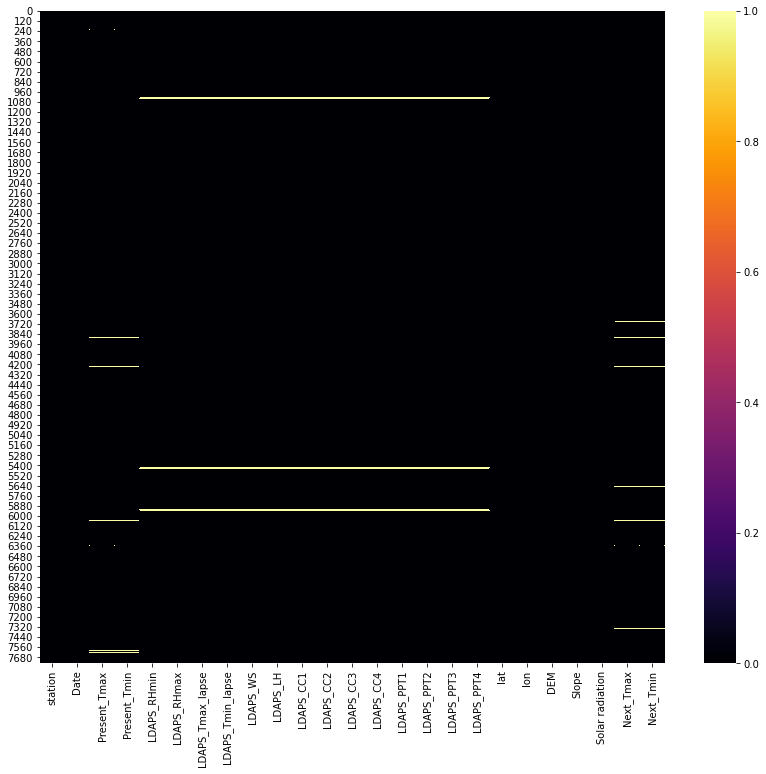

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(df.isnull(),cmap='inferno')

Here we have null values in dataframes

In [11]:
df1=df.dropna(axis=0)

we just droped 2% of data 

In [12]:
df1.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

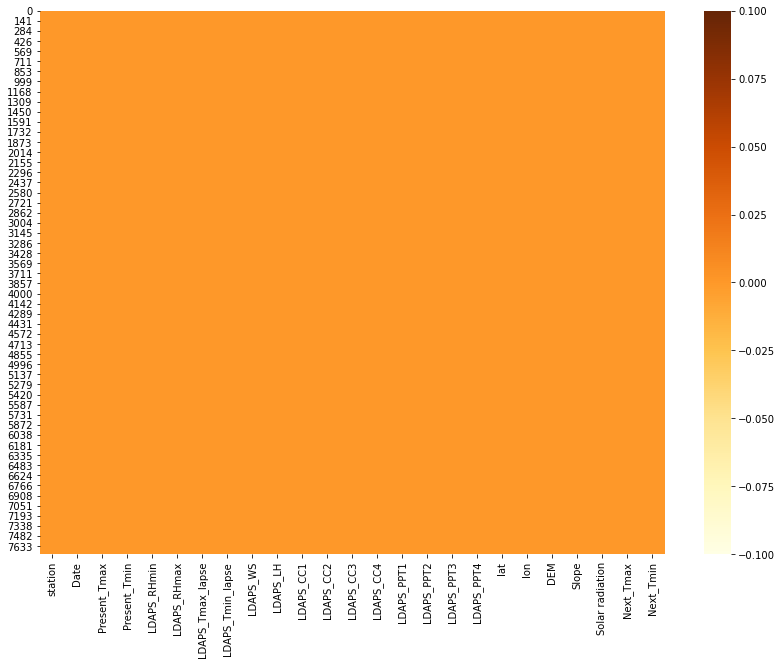

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.isnull(),cmap='YlOrBr')

### Check Correlation

corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

the correlation coefficient interval [−1, +1] is restricted by the individual distributions of the two variables being correlated.

-->0 indicates no linear relationship.

-->+1 indicates a perfect positive linear relationship – as one variable increases in its values, the other variable also increases in its values through an exact linear rule.

-->−1 indicates a perfect negative linear relationship – as one variable increases in its values, the other variable decreases in its values through an exact linear rule.

In [14]:
df1.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,0.003526,-0.000161,0.005005,-0.001954,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,-0.216976,-0.146391,-0.143069,-0.114917,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,0.090038,-0.004719,-0.046694,0.111577,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,0.744774,0.688069,0.513937,0.259039,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,0.390620,0.224734,0.127242,0.268019,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,-0.525380,-0.542728,-0.429739,-0.115659,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,0.046537,-0.044998,-0.079536,0.034956,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,0.257226,0.238155,0.218870,0.141503,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,-0.265382,-0.246709,-0.173156,-0.018708,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,0.779510,0.516698,0.362670,0.446930,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<AxesSubplot:>

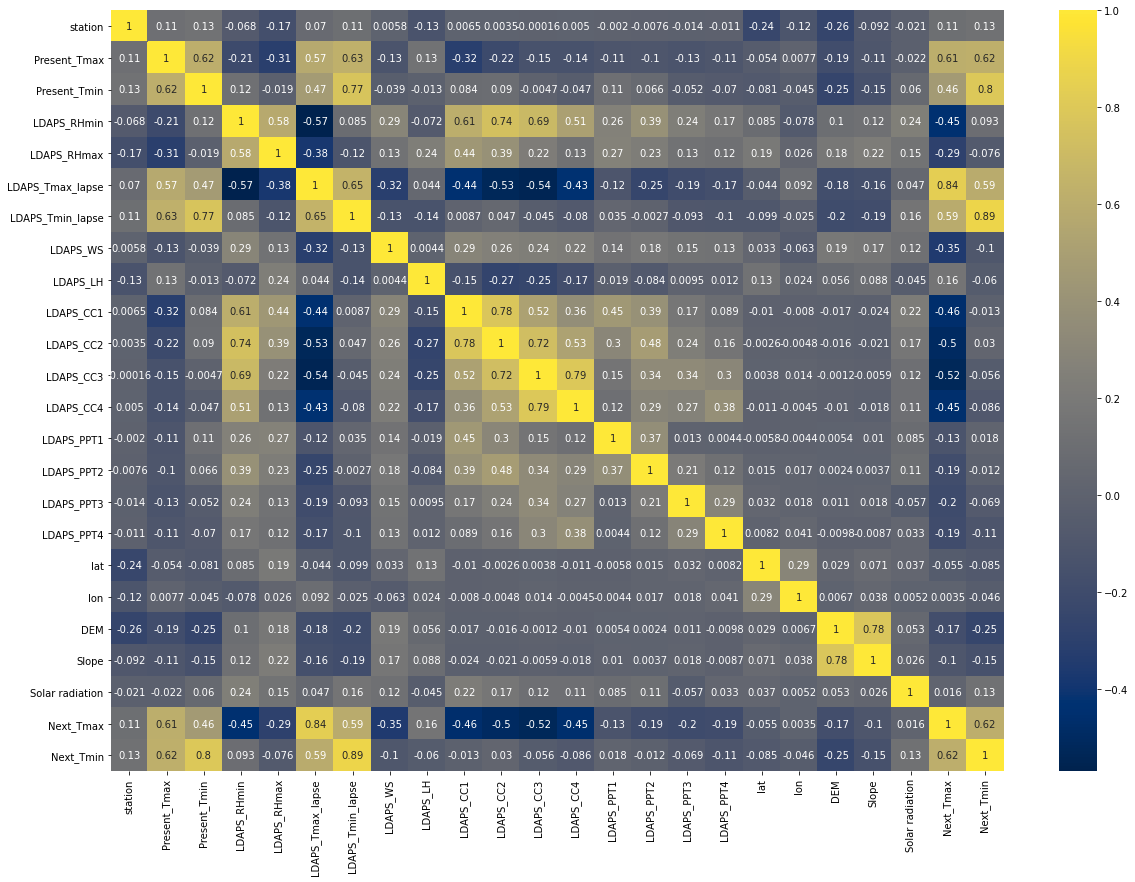

In [15]:
#plot the correlation in heatmap
plt.figure(figsize=(20,14))
sns.heatmap(df1.corr(),cmap='cividis',annot=True)

In [16]:
df1['Date']=pd.to_datetime(df1['Date'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


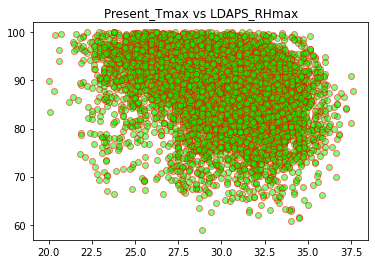

In [17]:
plt.scatter(df1['Present_Tmax'],df1['LDAPS_RHmax'],alpha=0.5,c=(0,1,0),edgecolor='r')
plt.title("Present_Tmax vs LDAPS_RHmax")
plt.show()

Present_tmax and LDAPS_RHmax has good correlation 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


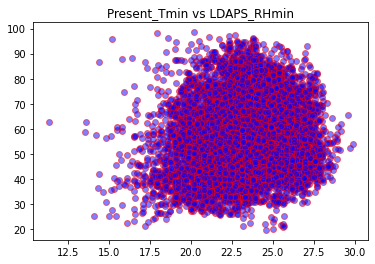

In [18]:
plt.scatter(df1['Present_Tmin'],df1['LDAPS_RHmin'],alpha=0.5,c=(0,0,1),edgecolor='r')
plt.title("Present_Tmin vs LDAPS_RHmin")
plt.show()

Present_tmin and LDAPS_RHmin has good correlation 

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='LDAPS_WS'>

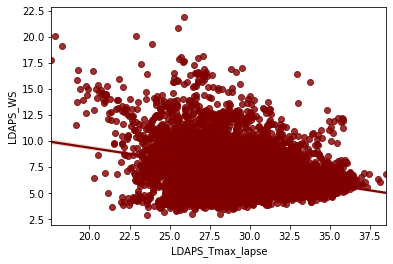

In [19]:
sns.regplot(x=df1['LDAPS_Tmax_lapse'],y=df1['LDAPS_WS'],color='maroon')

<AxesSubplot:xlabel='lat', ylabel='lon'>

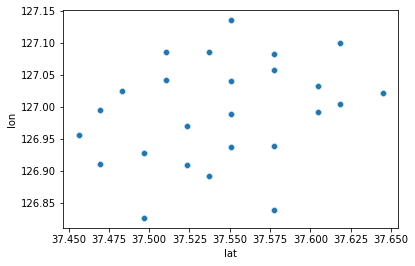

In [20]:
sns.scatterplot(x=df1['lat'], y=df1['lon'],palette='CMRmap_r')

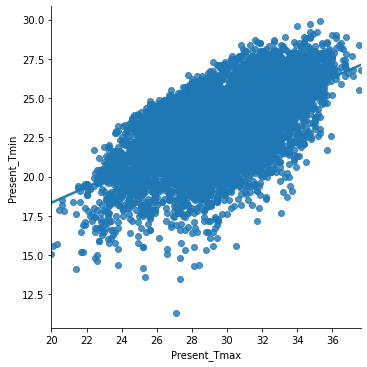

In [21]:
sns.lmplot(x="Present_Tmax", y="Present_Tmin", data=df1,palette='prism_r')

{'bodies': [<matplotlib.collections.PolyCollection at 0x2cbfd3970d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2cbfd388ee0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2cbfd397580>,
 'cbars': <matplotlib.collections.LineCollection at 0x2cbfd397880>}

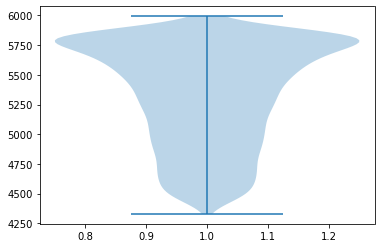

In [22]:
plt.violinplot(df1['Solar radiation'])

most of the values are above 5500 values 

In [23]:
df1=df1.drop(['station','Date'],axis=1)

In [24]:
df1.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

### Outliers

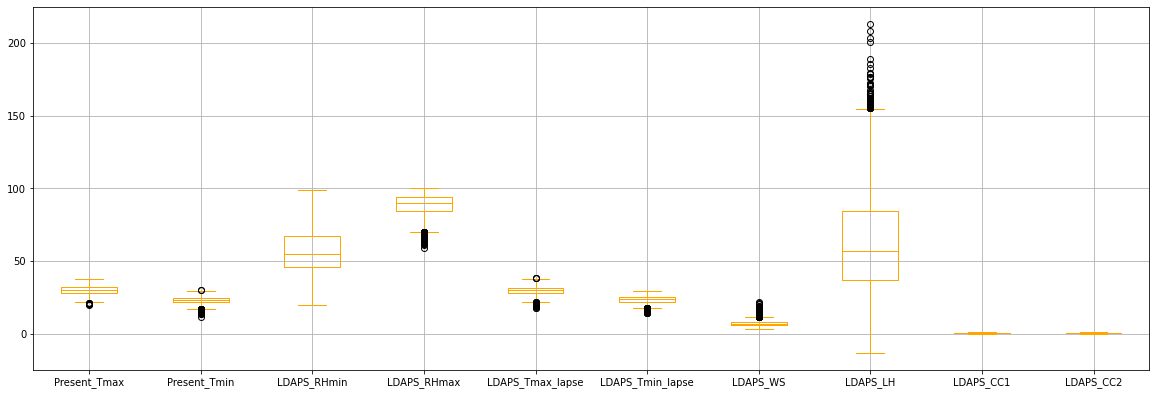

In [25]:
df1.iloc[:,:10].boxplot(figsize=(20,8),color='orange')
plt.subplots_adjust(bottom=0.25)
plt.show()

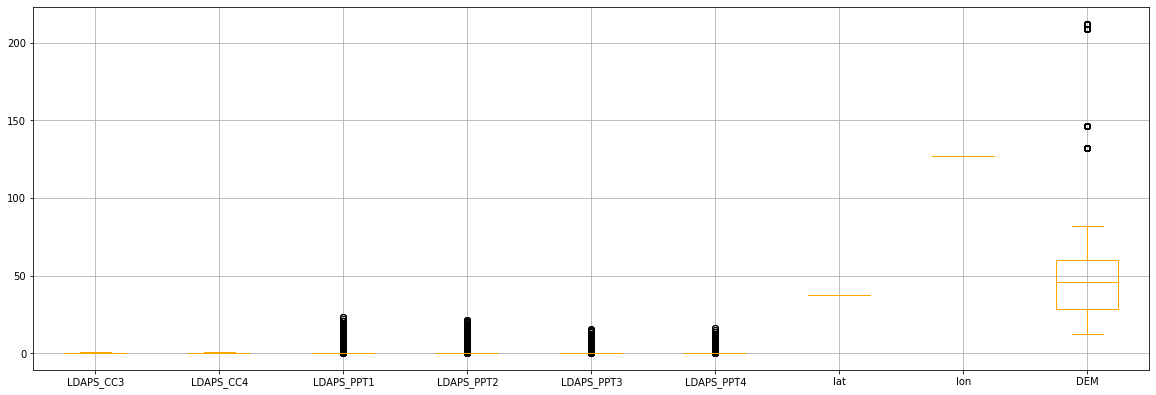

In [26]:
df.iloc[:,12:21].boxplot(figsize=(20,8),color='orange')
plt.subplots_adjust(bottom=0.25)
plt.show()

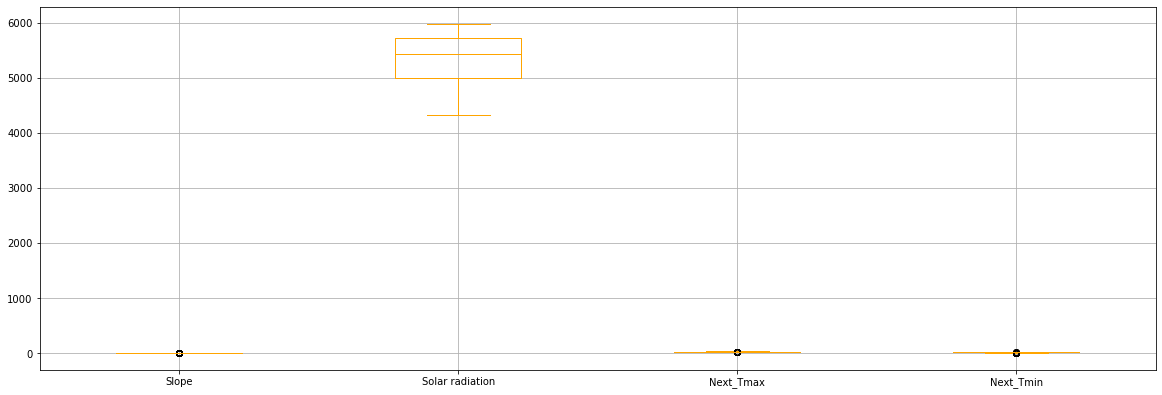

In [27]:
df.iloc[:,21:].boxplot(figsize=(20,8),color='orange')
plt.subplots_adjust(bottom=0.25)
plt.show()

we have outliers in the dataframes we have to handle outliers

In [28]:
zscr=np.abs(zscore(df1))

threshold=3
print(np.where(zscr>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 6, 13, 13, ...,  1,  1,  5], dtype=int64))


In [29]:
#Lets check the presence of outlier
print("shape before removing the outliers :",df1.shape)

dfnew=df1[(zscr<3).all(axis=1)]

print("shape after removing the outliers :",dfnew.shape)


shape before removing the outliers : (7588, 23)
shape after removing the outliers : (6739, 23)


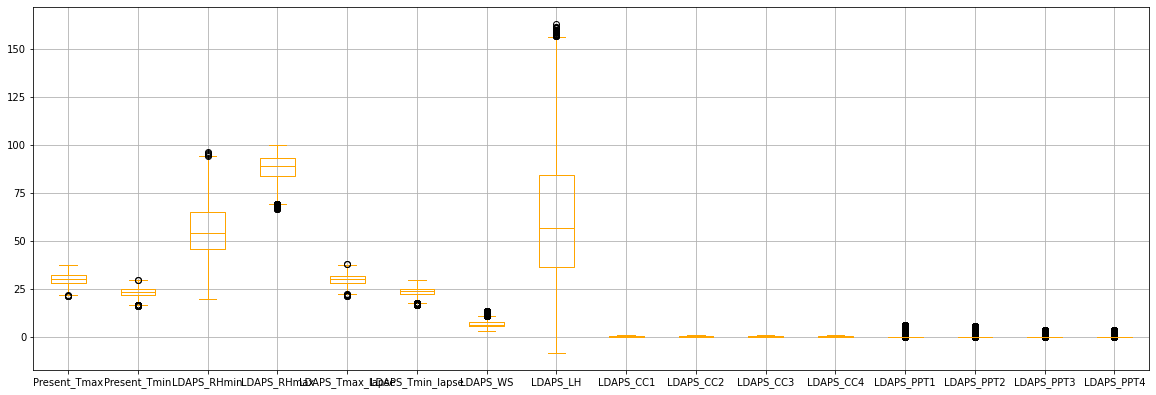

In [30]:
dfnew.iloc[:,:16].boxplot(figsize=(20,8),color='orange')
plt.subplots_adjust(bottom=0.25)
plt.show()

after applying zscore also we have some ouliters in it so we have handle these outliers individually 

#### definging functions to plot and clear the outliers 

In [31]:
def hist(feature_name):
    sns.set(style = "darkgrid")
    plt.figure(figsize=(6,6))
    sns.distplot(df1[feature_name],color='orange')
    
def boxplot(feature_name):
    plt.figure(figsize=(6,6))
    sns.set(style = "whitegrid")
    sns.boxplot(df1[feature_name],color='red')
    
def outlier_norm(feature):
    uppper_boundary=df1[feature].mean() + 3* df1[feature].std()
    lower_boundary=df1[feature].mean() - 3* df1[feature].std()
    print("lower_boundary:",lower_boundary), print("uppper_boundary",uppper_boundary)
    
def outlier_IQR(feature):
    IQR=df1[feature].quantile(0.75)-df1[feature].quantile(0.25)
    lower_boundary=df1[feature].quantile(0.25)-(IQR*1.5)
    upper_boundary=df1[feature].quantile(0.75)+(IQR*1.5)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)
    


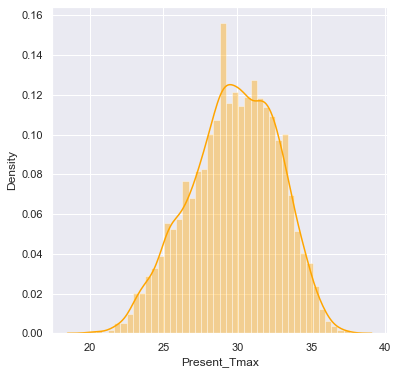

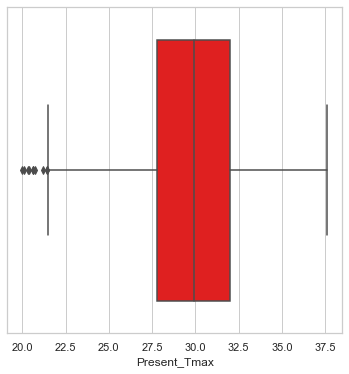

In [32]:
hist('Present_Tmax')
boxplot('Present_Tmax')

it is normally distributer and it has some ouliers also but there are near to whisker so we no need to remove those outliers

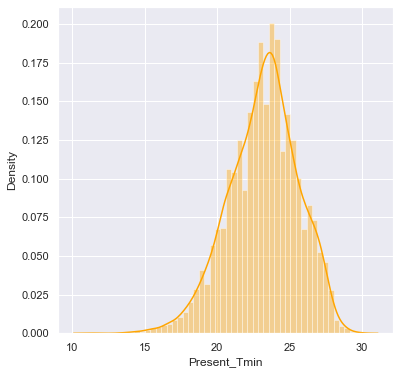

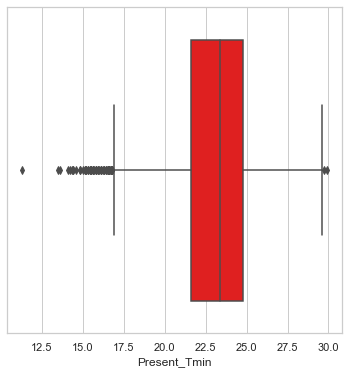

In [33]:
hist('Present_Tmin')
boxplot('Present_Tmin')

it is slight skewed and some outliers are presented in the column

In [34]:
outlier_IQR('Present_Tmin')

lower_boundary: 16.800000000000004
uppper_boundary 29.6


In [35]:
df1.loc[df1['Present_Tmin']<16.8,'Present_Tmin']=16.8
df1.loc[df1['Present_Tmin']>29.6,'Present_Tmin']=29.6

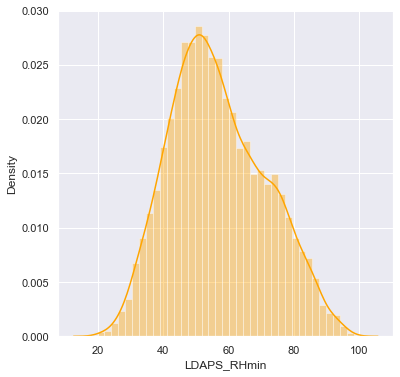

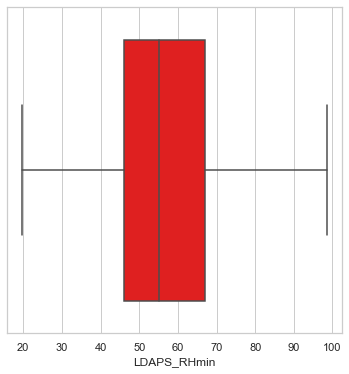

In [36]:
hist('LDAPS_RHmin')
boxplot('LDAPS_RHmin')

there is no outlier in th LDAPS_RHmin columns and normally distributed

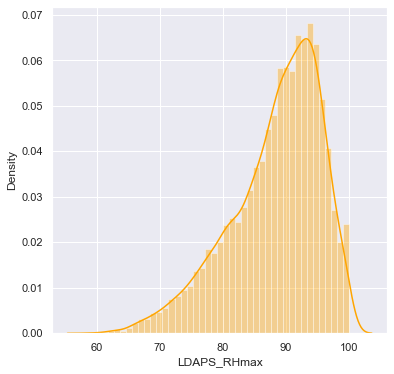

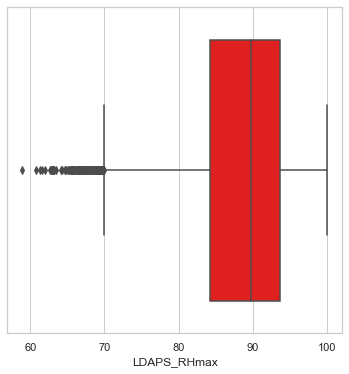

In [37]:
hist('LDAPS_RHmax')
boxplot('LDAPS_RHmax')

LDAPS_RHmin column is normally distributed and outliers are present in the column

In [38]:
outlier_norm('LDAPS_RHmax')

lower_boundary: 66.7624544175778
uppper_boundary 109.95919232315777


In [39]:
df1.loc[df1['LDAPS_RHmax']<66.76,'LDAPS_RHmax']=66.76

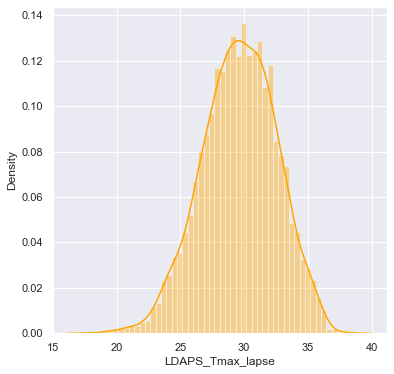

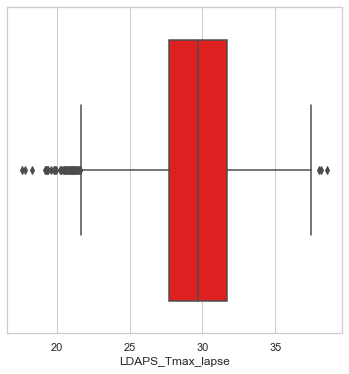

In [40]:
hist('LDAPS_Tmax_lapse')
boxplot('LDAPS_Tmax_lapse')

outliers are present in LDAPS_Tmax_lapse columns and data is normally distributed

In [41]:
outlier_norm('LDAPS_Tmax_lapse')

lower_boundary: 20.789639501884455
uppper_boundary 38.45061587825256


In [42]:
df1.loc[df1['LDAPS_Tmax_lapse']<20.79,'LDAPS_Tmax_lapse']=20.79
df1.loc[df1['LDAPS_Tmax_lapse']>38.45,'LDAPS_Tmax_lapse']=38.45

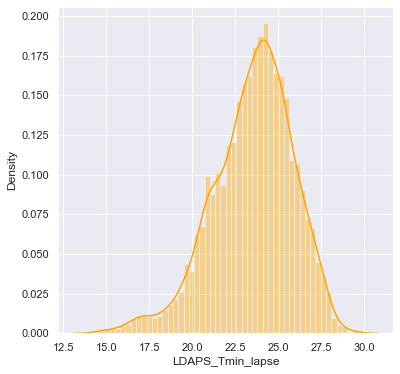

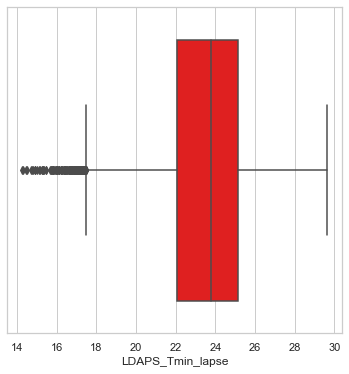

In [43]:
hist('LDAPS_Tmin_lapse')
boxplot('LDAPS_Tmin_lapse')

data is distributed normally and outliers are presented in LDAPS_Tmin_lapse column

In [44]:
outlier_norm('LDAPS_Tmin_lapse')

lower_boundary: 16.484049540199493
uppper_boundary 30.539522772454852


In [45]:
df1.loc[df1['LDAPS_Tmin_lapse']<16.48,'LDAPS_Tmin_lapse']=16.48

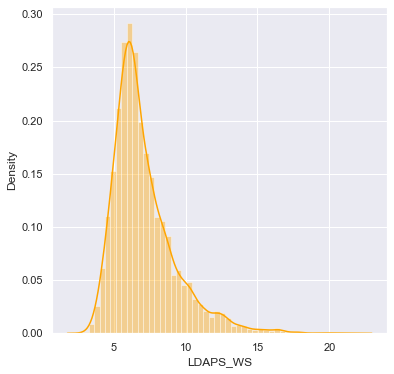

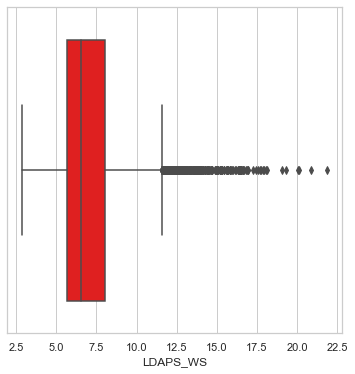

In [46]:
hist('LDAPS_WS')
boxplot('LDAPS_WS')

LDAPS_WS column has outliers and it slight skewed 

In [47]:
outlier_IQR('LDAPS_WS')

lower_boundary: 2.144953807874999
uppper_boundary 11.559364270875001


In [48]:
df1.loc[df1['LDAPS_WS']>11.56,'LDAPS_WS']=11.56

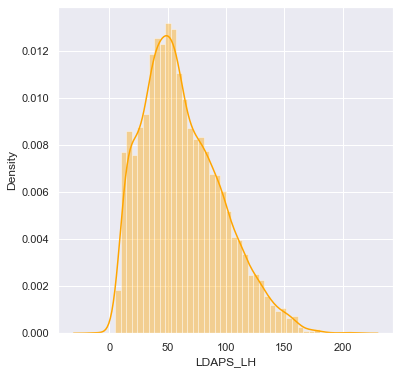

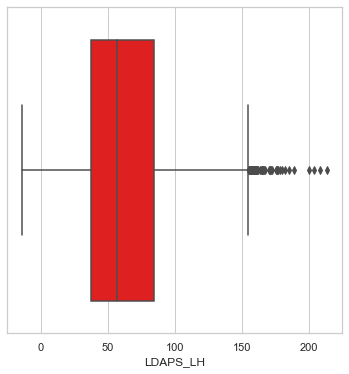

In [49]:
hist('LDAPS_LH')
boxplot('LDAPS_LH')

In [50]:
outlier_IQR('LDAPS_LH')

lower_boundary: -33.337995973750004
uppper_boundary 154.77986333625


In [51]:
df1.loc[df1['LDAPS_LH']>154.78,'LDAPS_LH']=154.78

LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4 columns are no outlier we can see those features in box plots 

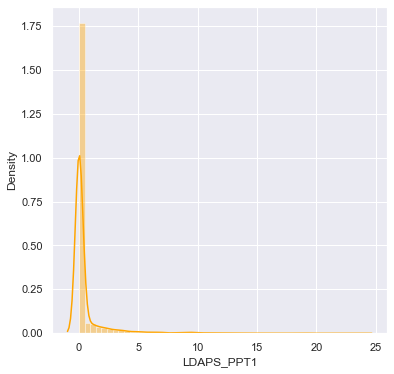

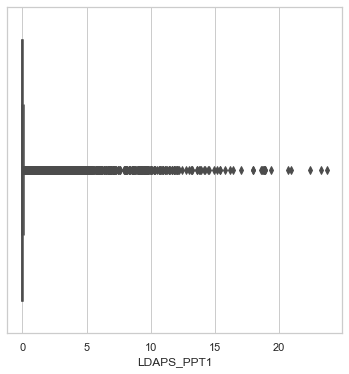

In [52]:
hist('LDAPS_PPT1')
boxplot('LDAPS_PPT1')

disribution is right skewed and it has too many outliers 

In [53]:
outlier_IQR('LDAPS_PPT1')

lower_boundary: -0.078891181875
uppper_boundary 0.131485303125


In [54]:
df1.loc[df1['LDAPS_PPT1']>0.131,'LDAPS_PPT1']=0.131

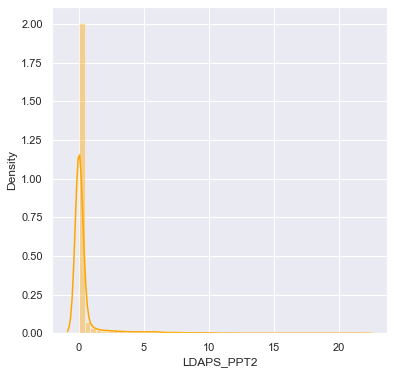

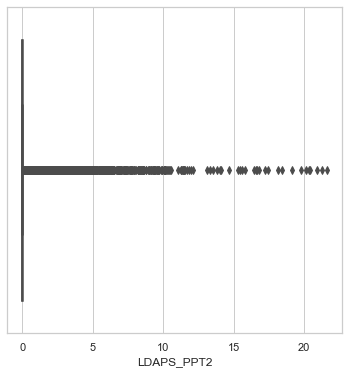

In [55]:
hist('LDAPS_PPT2')
boxplot('LDAPS_PPT2')

In [56]:
outlier_IQR('LDAPS_PPT2')

lower_boundary: -0.026603085749999998
uppper_boundary 0.044338476249999995


In [57]:
df1.loc[df1['LDAPS_PPT2']>0.044,'LDAPS_PPT2']=0.044

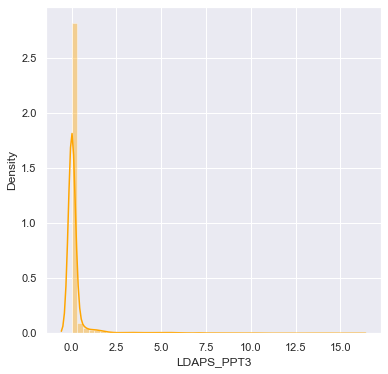

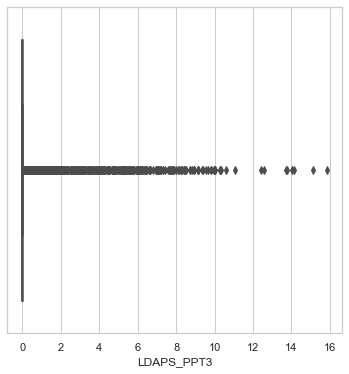

In [58]:
hist('LDAPS_PPT3')
boxplot('LDAPS_PPT3')

distribution has skewed and outliers are present in column

In [59]:
outlier_IQR('LDAPS_PPT3')

lower_boundary: -0.01178187525
uppper_boundary 0.019636458750000002


In [60]:
df1.loc[df1['LDAPS_PPT3']>0.019,'LDAPS_PPT3']=0.019

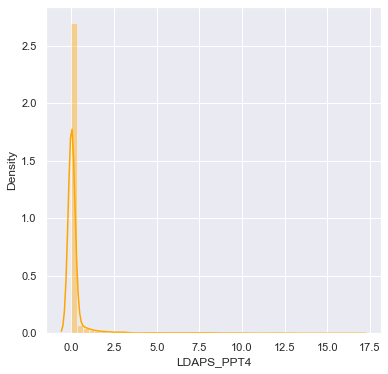

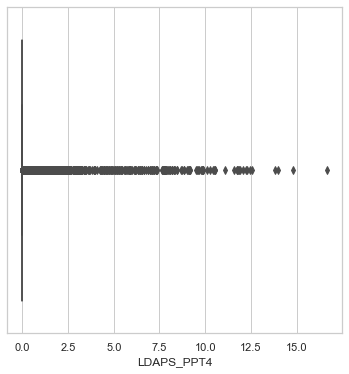

In [61]:
hist('LDAPS_PPT4')
boxplot('LDAPS_PPT4')

In [62]:
outlier_IQR('LDAPS_PPT4')

lower_boundary: -2.5274999999999998e-05
uppper_boundary 4.2124999999999994e-05


In [63]:
df1.loc[df1['LDAPS_PPT4']>4.21,'LDAPS_PPT4']=4.21

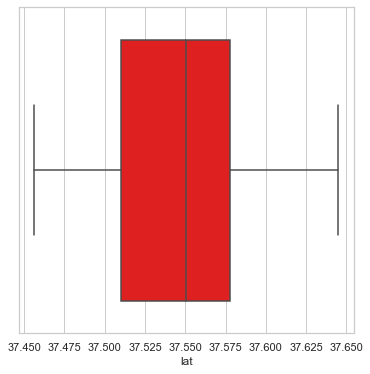

In [64]:
boxplot('lat')

lat column has no outliers

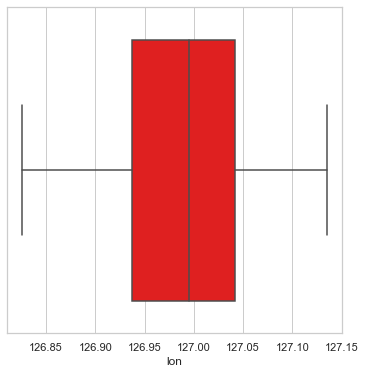

In [65]:
boxplot('lon')

lon column has no outliers

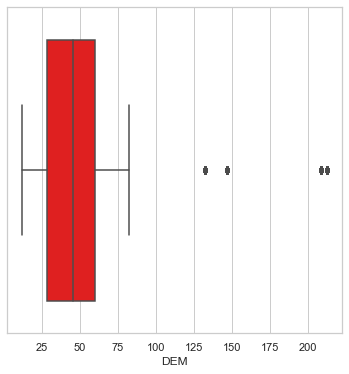

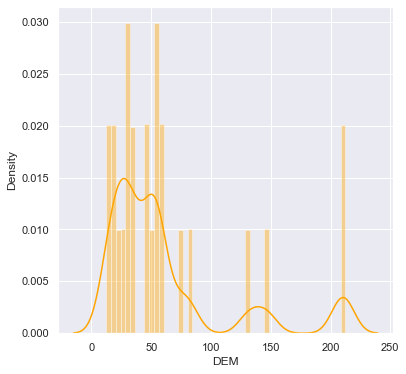

In [66]:
boxplot('DEM')
hist('DEM')

it has normally distributed and has 4 outliers but those are far from whisker 

In [67]:
outlier_IQR('DEM')

lower_boundary: -17.9986
uppper_boundary 106.531


In [68]:
df1.loc[df1['DEM']>106.53,'DEM']=106.53

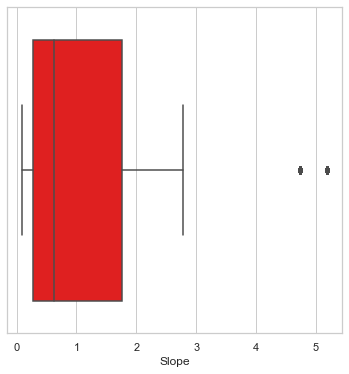

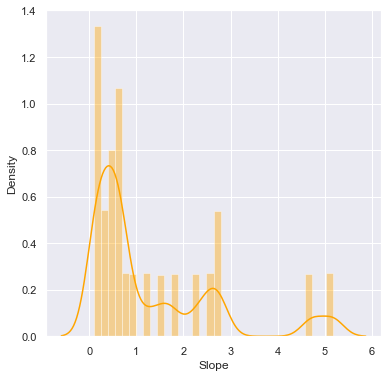

In [69]:
boxplot('Slope')
hist('Slope')

In [70]:
outlier_IQR('Slope')

lower_boundary: -1.9734500000000001
uppper_boundary 4.01255


In [71]:
df1.loc[df1['Slope']>4.01,'Slope']=4.01

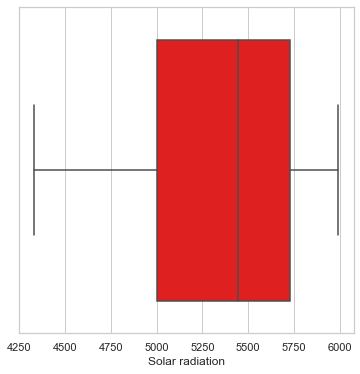

In [72]:
boxplot('Solar radiation')

not ouliers in Solar radiation column

###  spliting traget variable and independent features

In [73]:
x=df1.drop(columns=["Next_Tmax","Next_Tmin"])
y=df1[["Next_Tmax","Next_Tmin"]]

## Apply train_test_split to the data

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=33)

In [75]:
x_train.shape

(5311, 21)

In [76]:
y_train.shape

(5311, 2)

In [77]:
x_test.shape

(2277, 21)

In [78]:
y_test.shape

(2277, 2)

## Apply Machine Learning Algorithms

In [79]:
models=[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor(),
      BaggingRegressor(),AdaBoostRegressor(),KNeighborsRegressor(),ElasticNet(),SVR()]

model_name=["LinearRegression","Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor",
      "BaggingRegressor","AdaBoostRegressor","KNeighborsRegressor","ElasticNet","SVR"]

accuracies=[]

In [80]:
for m in models:
    print("model:", m)
    clf = MultiOutputRegressor(m)
    clf.fit(x_train, y_train)
    pred=clf.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('mean_absolute_error:',mean_absolute_error(y_test,pred))
    print('mean_squared_error:',mean_squared_error(y_test,pred))
    accuracy = r2_score(y_test, pred)*100
    accuracies.append(accuracy)
    print()
    scr=cross_val_score(clf,x,y,cv=5)
    print("Cross validation score:",scr.mean())
    print('------------------------------------------------------------')

model: LinearRegression()
r2_score: 0.8061583500725095
mean_absolute_error: 0.9554193131264364
mean_squared_error: 1.6218250003211665

Cross validation score: 0.7495987758372825
------------------------------------------------------------
model: Lasso()
r2_score: 0.7579228885369791
mean_absolute_error: 1.0906915827527333
mean_squared_error: 2.0085920380155162

Cross validation score: 0.7017111959738026
------------------------------------------------------------
model: Ridge()
r2_score: 0.8055695316867533
mean_absolute_error: 0.9557251357338716
mean_squared_error: 1.6265480119571847

Cross validation score: 0.7510335425864104
------------------------------------------------------------
model: DecisionTreeRegressor()
r2_score: 0.756632074510118
mean_absolute_error: 1.003227931488801
mean_squared_error: 1.9910474308300397

Cross validation score: 0.5095538672849667
------------------------------------------------------------
model: RandomForestRegressor()
r2_score: 0.8944881620716965
mea

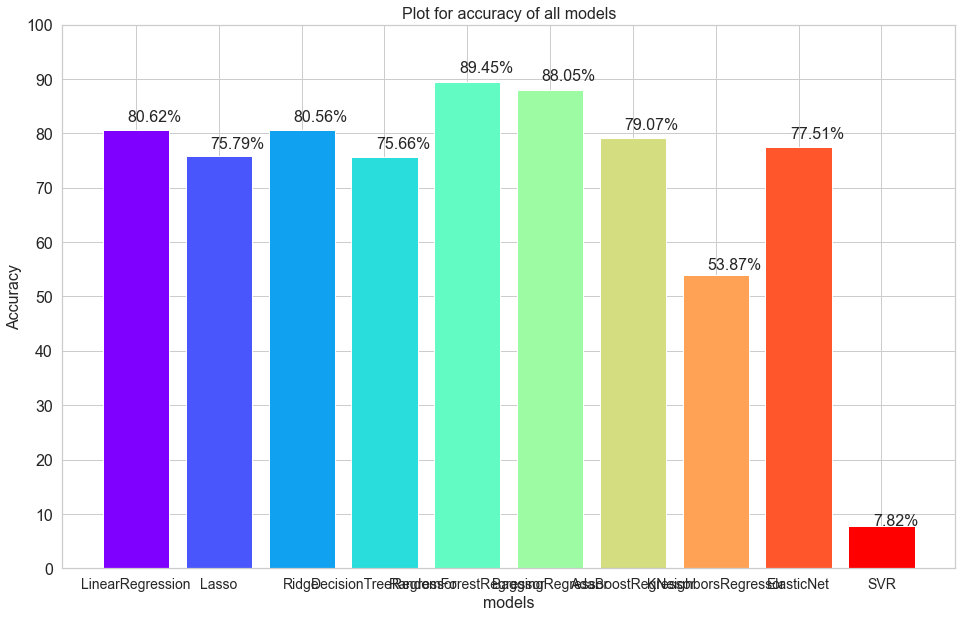

In [81]:
from matplotlib.cm import rainbow

plt.figure(figsize = (16, 10))
colors = rainbow(np.linspace(0, 1, len(models)))
barplot = plt.bar(model_name, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("models", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all models", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

RandomForestRegressor has good accuracy this is our best model

In [84]:
model = MultiOutputRegressor(RandomForestRegressor())
model.fit(x_train, y_train)
pred=model.predict(x_test)
print("r2_score:",r2_score(y_test,pred))

r2_score: 0.8957028112740262


## Save the model

In [85]:
import joblib
joblib.dump(model,"Temperature-Forecast-Project.pkl")

['Temperature-Forecast-Project.pkl']

## Loading the saved model

In [88]:
m=joblib.load('Temperature-Forecast-Project.pkl')

In [89]:
pred=m.predict(x_test)

In [91]:
print("accuracy score:",r2_score(y_test,pred))

accuracy score: 0.8957028112740262
